# Programming exercises

# Question 1: 
build a function that will get a number in base 10 and will print the number in bases 2,8,16.

In [1]:
def print_other_bases(num):
    "prints the decimal number given in bases 2,8,16."
    print(format(num,'b'))#print the number in binary format (base 2)
    print(format(num,'o'))#print the number in octal format (base 8)
    print(format(num,'x'))#print the number in hex format (base 16)
    
print_other_bases(79)

1001111
117
4f


# Question 2:
this question includes movies dataset, load the dataset and answer the questions below.

In [2]:
import pandas as pd
cast=pd.read_csv('Datasets/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


## section 1:
How many movies have the title "Hamlet"?

In [3]:
print ('movies with title "Hamlet": ' + str(len(cast['Hamlet'==cast['title']])))
#cast['Hamlet'==cast['title']] gives a sub-dataset
print ('movies with title that contains "Hamlet": ' + str(len(cast[cast['title'].str.contains('Hamlet')])))
#cast['title'].str.contains('Hamlet')   gives a mask

movies with title "Hamlet": 299
movies with title that contains "Hamlet": 891


## section 2:
List all of the "Treasure Island" movies from earliest to most recent.

In [4]:
cast['Treasure Island'==cast['title']].sort_values('year')

,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
3280557,Treasure Island,1918,Eleanor Washington,actress,Prologue Player,NaN
3046750,Treasure Island,1918,Violet Radcliffe,actress,Long John Silver,3.0
1167783,Treasure Island,1918,Raymond Lee,actor,Bit Role,NaN
1195421,Treasure Island,1918,Elmo Lincoln,actor,Prologue Player,NaN
...,...,...,...,...,...,...
1663860,Treasure Island,1999,Victor Raider-Wexler,actor,Samowitz,10.0
1731182,Treasure Island,1999,Scot Thomas Robinson,actor,Jimmy,11.0
1813707,Treasure Island,1999,Richard Schave,actor,Man,21.0
2710458,Treasure Island,1999,Stephanie Ittleson,actress,Stella,7.0


## section 3:
How many roles were credited in the silent 1921 version of Hamlet?

In [5]:
len(cast[cast['title']=='Hamlet'][cast['year']==1921])

9

## section 4:
Use groupby() to plot the number of "Hamlet" films made each decade

<AxesSubplot:xlabel='year'>

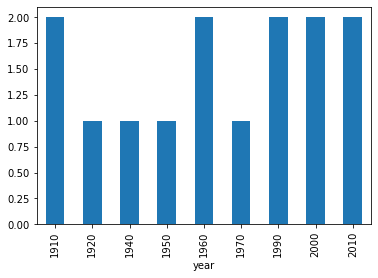

In [6]:
import matplotlib.pyplot as plt
#I used only movies called "Hamlet"
hamlet_films=cast['Hamlet'==cast['title']]
hamlet_films['year']=hamlet_films['year']//10*10 #divide to int by 10
# to avoid multiple appearances of the same movie I counted the number of lead role given in Hamlet movies (probably 1 per movie)
hamlet_films[hamlet_films['n']==1].groupby('year').size().plot(kind='bar')

## section 5:
How many leading (n=1) roles were available to actors, and how many to
actresses, in each year of the 1950s?

In [7]:
#n=1, year under 1960, year above 1950.
cast[cast['n']==1][cast['year']<1960][cast['year']>=1950]['type'].value_counts()

actor      6388
actress    2813
Name: type, dtype: int64

## section 6:
List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

In [8]:
cast[cast['n']==1][cast['year']<=1990]['name'].value_counts()[:10]

Charles Starrett     200
Buck Jones           130
Johnny Mack Brown    124
John Wayne           117
Rajesh Khanna        115
Bob Steele           110
William Boyd          95
Hoot Gibson           93
Tom Mix               93
Jack Holt             93
Name: name, dtype: int64

## section 7:
List, in order by year, each of the films in which Frank Oz has played more than
1 role

In [13]:
frank_film=cast[cast['name']=='Frank Oz']# films with Frank Oz
frank_vc=frank_film['title'].value_counts()# appearances by title
answer=pd.DataFrame()
for count in frank_vc.keys():
    if frank_vc[count]!=1:# more than 1 appearance
        answer=answer.append(frank_film[frank_film.title==count])
answer.sort_values('year')

,title,year,name,type,character,n
1538820,The Muppet Movie,1979,Frank Oz,actor,Miss Piggy,2.0
1538821,The Muppet Movie,1979,Frank Oz,actor,Fozzie Bear,2.0
1538822,The Muppet Movie,1979,Frank Oz,actor,Animal,2.0
1538823,The Muppet Movie,1979,Frank Oz,actor,Sam the Eagle,2.0
1538824,The Muppet Movie,1979,Frank Oz,actor,Doc Hopper's Men,2.0
1538825,The Muppet Movie,1979,Frank Oz,actor,Marvin Suggs,2.0
1538826,The Muppet Movie,1979,Frank Oz,actor,Swedish Chef (assistant),2.0
1538827,The Muppet Movie,1979,Frank Oz,actor,Motorcycle Guy,2.0
1538812,The Great Muppet Caper,1981,Frank Oz,actor,Swedish Chef,2.0
1538811,The Great Muppet Caper,1981,Frank Oz,actor,Gramps,2.0
